In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from functools import reduce

In [2]:
dtype = {
    'rate-reason-deletions': 'Int64',
    'rate-RAT-introductions': 'Int64',
    'rate-RUP-introductions': 'Int64',
}

df = pd.read_csv('results.csv', dtype=dtype)

df['time-overhead'] = df['rate-time'] - df['rate-d-time']
df['space-overhead'] = df['rate-space'] - df['rate-d-space']

df['time-overhead-gratgen'] = df['rate-d-time'] - df['gratgen-time']

checkers = 'rate', 'rate-d', 'drat-trim', 'gratgen'

In [31]:
df.columns

Index(['instance', 'solver', 'stime', 'sresult', 'rate-result', 'rate-time',
       'rate-space', 'rate-solution', 'rate-verified', 'rate-reason-deletions',
       'rate-RAT-introductions', 'rate-RUP-introductions', 'rate-d-result',
       'rate-d-time', 'rate-d-space', 'rate-d-solution', 'rate-d-verified',
       'rate-d-reason-deletions', 'gratgen-result', 'gratgen-time',
       'gratgen-space', 'gratgen-solution', 'gratgen-verified',
       'drat-trim-result', 'drat-trim-time', 'drat-trim-space',
       'drat-trim-solution', 'drat-trim-verified', 'time-overhead',
       'space-overhead', 'time-overhead-gratgen'],
      dtype='object')

## Riss

In [52]:
df[(df['solver'] == 'Riss7.1-fix@BVE_DRAT') & (df['rate-solution'] == 'NOT VERIFIED')]

,instance,solver,stime,sresult,rate-result,rate-time,rate-space,rate-solution,rate-verified,rate-reason-deletions,...,gratgen-solution,gratgen-verified,drat-trim-result,drat-trim-time,drat-trim-space,drat-trim-solution,drat-trim-verified,time-overhead,space-overhead,time-overhead-gratgen
3428,T103.2.0,Riss7.1-fix@BVE_DRAT,1529.18,UNSATISFIABLE,rejected,103.34,3473.8,NOT VERIFIED,NaN,23763,...,ERROR,NaN,rejected,161.63,1761.3,NOT VERIFIED,NaN,-36.73,26.7,-11.70
3545,T116.2.0,Riss7.1-fix@BVE_DRAT,551.83,UNSATISFIABLE,rejected,104.79,3419.3,NOT VERIFIED,NaN,17360,...,ERROR,NaN,rejected,138.34,1621.4,NOT VERIFIED,NaN,-5.70,20.8,-19.32
3701,T129.2.0,Riss7.1-fix@BVE_DRAT,1713.28,UNSATISFIABLE,rejected,392.74,2082.2,NOT VERIFIED,NaN,112305,...,VERIFIED,NaN,verified,194.91,1656.8,VERIFIED,VERIFIED,181.82,177.4,41.12
3779,T62.2.0,Riss7.1-fix@BVE_DRAT,2628.29,UNSATISFIABLE,rejected,222.03,3474.3,NOT VERIFIED,NaN,32793,...,VERIFIED,NaN,verified,1938.62,2207.0,VERIFIED,VERIFIED,NaN,NaN,NaN
3857,T82.2.0,Riss7.1-fix@BVE_DRAT,813.24,UNSATISFIABLE,rejected,127.53,3435.6,NOT VERIFIED,NaN,32863,...,ERROR,NaN,rejected,174.57,1505.3,NOT VERIFIED,NaN,-24.24,246.9,-11.69
3935,T86.2.0,Riss7.1-fix@BVE_DRAT,1947.47,UNSATISFIABLE,rejected,169.44,2081.6,NOT VERIFIED,NaN,32518,...,ERROR,NaN,rejected,183.28,1391.2,NOT VERIFIED,NaN,8.56,-14.4,1.16
4013,T90.2.0,Riss7.1-fix@BVE_DRAT,796.40,UNSATISFIABLE,rejected,96.84,3362.7,NOT VERIFIED,NaN,24419,...,ERROR,NaN,rejected,163.61,1537.8,NOT VERIFIED,NaN,-30.04,1.5,-19.94
4052,T92.2.0,Riss7.1-fix@BVE_DRAT,1190.69,UNSATISFIABLE,rejected,113.15,3383.1,NOT VERIFIED,NaN,26121,...,ERROR,NaN,rejected,141.82,1460.3,NOT VERIFIED,NaN,-19.08,16.4,-6.83


In [53]:
df[(df['solver'] == 'Sparrow2Riss-2018-fixfix@MAIN') & (df['rate-solution'] == 'NOT VERIFIED')]

,instance,solver,stime,sresult,rate-result,rate-time,rate-space,rate-solution,rate-verified,rate-reason-deletions,...,gratgen-solution,gratgen-verified,drat-trim-result,drat-trim-time,drat-trim-space,drat-trim-solution,drat-trim-verified,time-overhead,space-overhead,time-overhead-gratgen
2884,Problem14_label48_true-unreach-call.c,Sparrow2Riss-2018-fixfix@MAIN,230.62,UNSATISFIABLE,rejected,2938.90,3684.5,NOT VERIFIED,NaN,168671,...,ERROR,NaN,rejected,142.36,1170.7,NOT VERIFIED,NaN,2678.69,-32.2,146.59
3664,T125.2.0,Sparrow2Riss-2018-fixfix@MAIN,791.60,UNSATISFIABLE,rejected,145.49,1988.8,NOT VERIFIED,NaN,37581,...,ERROR,NaN,rejected,169.23,1295.2,NOT VERIFIED,NaN,-28.33,19.5,31.37
3703,T129.2.0,Sparrow2Riss-2018-fixfix@MAIN,996.50,UNSATISFIABLE,rejected,116.11,3393.2,NOT VERIFIED,NaN,23290,...,ERROR,NaN,rejected,154.53,1455.5,NOT VERIFIED,NaN,-17.03,-10.7,-10.10
3898,T84.2.0,Sparrow2Riss-2018-fixfix@MAIN,803.67,UNSATISFIABLE,rejected,147.65,3779.7,NOT VERIFIED,NaN,12397,...,ERROR,NaN,rejected,213.00,2073.8,NOT VERIFIED,NaN,-4.31,3.3,-38.66
3937,T86.2.0,Sparrow2Riss-2018-fixfix@MAIN,2461.12,UNSATISFIABLE,rejected,202.19,2227.2,NOT VERIFIED,NaN,33103,...,ERROR,NaN,rejected,214.02,1563.6,NOT VERIFIED,NaN,-17.03,-30.7,40.14
3976,T87.2.0,Sparrow2Riss-2018-fixfix@MAIN,1237.21,UNSATISFIABLE,rejected,99.12,3595.8,NOT VERIFIED,NaN,15341,...,ERROR,NaN,rejected,178.76,1905.5,NOT VERIFIED,NaN,-29.25,58.5,-44.15
4054,T92.2.0,Sparrow2Riss-2018-fixfix@MAIN,646.70,UNSATISFIABLE,rejected,111.52,3518.5,NOT VERIFIED,NaN,19284,...,ERROR,NaN,rejected,167.60,1808.0,NOT VERIFIED,NaN,-42.78,0.2,-2.69


In [56]:
df[(df['solver'] == 'Sparrow2Riss-2018-fixfix@MAIN') & (df['rate-solution'] == 'NOT VERIFIED') & (df['instance'] == 'Problem14_label48_true-unreach-call.c')]

,instance,solver,stime,sresult,rate-result,rate-time,rate-space,rate-solution,rate-verified,rate-reason-deletions,...,gratgen-solution,gratgen-verified,drat-trim-result,drat-trim-time,drat-trim-space,drat-trim-solution,drat-trim-verified,time-overhead,space-overhead,time-overhead-gratgen
2884,Problem14_label48_true-unreach-call.c,Sparrow2Riss-2018-fixfix@MAIN,230.62,UNSATISFIABLE,rejected,2938.9,3684.5,NOT VERIFIED,NaN,168671,...,ERROR,NaN,rejected,142.36,1170.7,NOT VERIFIED,NaN,2678.69,-32.2,146.59


In [57]:
df[(df['solver'] == 'Sparrow2Riss-2018-fixfix@MAIN') & (df['rate-solution'] == 'NOT VERIFIED') & (df['instance'] == 'Problem14_label48_true-unreach-call.c')]['rate-d-solution']

2884    NOT VERIFIED
Name: rate-d-solution, dtype: object

# Lingeling

In [66]:
df[(df['solver'] == 'Lingeling@default')]['rate-solution'].unique()

array([nan, 'VERIFIED', 'error'], dtype=object)

## Reason deletions

In [42]:
# TODO remove redundant reason deletions
df.groupby(['solver'])['rate-reason-deletions'].mean()

solver
COMiniSatPS_Pulsar_drup@drup                    12747.886364
CaDiCaL@DONTUNZIP-fixed                         22049.628571
Candy@default                                     121.947368
GHackCOMSPS_drup@ghack_drup                     12343.583333
Glucose_Hack_Kiel_fastBVE@default               11491.370370
Lingeling@default                                1736.714286
MapleCOMSPS_CHB_VSIDS_drup@CHB_VSIDS_drup        8289.363636
MapleCOMSPS_LRB_VSIDS_2_fix@LRB_VSIDS_2_drup     4880.675000
MapleCOMSPS_LRB_VSIDS_drup@LRB_VSIDS_drup        7459.175000
MapleLCMDistChronoBT@default                     9768.500000
Maple_CM@default                                15151.125000
Maple_CM_Dist@default                            1691.487179
Maple_CM_ordUIP+@default                         8728.108108
Maple_CM_ordUIP@default                         11605.538462
Maple_LCM+BCrestart@default                      7510.365854
Maple_LCM+BCrestart_M1@default                   6960.600000
Maple_LCM_M1@defa

In [3]:
df[df['rate-result'] == 'verified'].head()

,instance,solver,stime,sresult,rate-result,rate-time,rate-space,rate-solution,rate-verified,rate-reason-deletions,...,gratgen-solution,gratgen-verified,drat-trim-result,drat-trim-time,drat-trim-space,drat-trim-solution,drat-trim-verified,time-overhead,space-overhead,time-overhead-gratgen
40,ae_rphp035_05,abcdsat_r18@default,877.57,UNSATISFIABLE,verified,9801.48,6260.6,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,10410.25,10804.9,VERIFIED,VERIFIED,2101.48,-32.0,658.57
75,ae_rphp035_05,smallsat@default,789.42,UNSATISFIABLE,verified,4122.71,4734.9,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,5258.80,9123.3,VERIFIED,VERIFIED,137.25,70.6,631.66
117,ae_rphp055_04,CaDiCaL@DONTUNZIP-fixed,389.93,UNSATISFIABLE,verified,463.58,1439.1,VERIFIED,VERIFIED,190,...,VERIFIED,NaN,verified,637.18,4669.9,VERIFIED,VERIFIED,-1.35,0.2,72.98
137,ae_rphp055_04,Lingeling@default,2015.36,UNSATISFIABLE,verified,2352.07,2225.5,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,3001.10,5392.1,VERIFIED,VERIFIED,-87.43,0.0,302.17
152,ae_rphp055_04,Riss7.1-fix@BVE_DRAT,1041.79,UNSATISFIABLE,verified,965.37,2358.8,VERIFIED,VERIFIED,29,...,VERIFIED,NaN,verified,1232.13,4495.6,VERIFIED,VERIFIED,0.24,-25.6,153.65


In [4]:
df.describe()

,rate-time,rate-space,rate-reason-deletions,rate-RAT-introductions,rate-RUP-introductions,rate-d-time,rate-d-space,rate-d-reason-deletions,gratgen-time,gratgen-space,gratgen-verified,drat-trim-time,drat-trim-space,time-overhead,space-overhead,time-overhead-gratgen
count,1290.000000,1290.000000,1245.000000,1245.000000,1.245000e+03,1092.000000,1092.000000,1051.000000,1153.000000,1153.000000,0.0,1109.000000,1109.000000,1092.000000,1092.000000,1034.000000
mean,564.523767,2156.990388,9565.877912,32.301205,3.804570e+05,1241.815733,2419.179762,17900.000951,959.911492,1679.467997,NaN,1382.806132,3066.889360,-624.362793,-227.760348,349.572805
std,1552.129461,2585.413468,30818.788327,308.137826,1.274639e+06,2296.336057,2856.557944,58596.701823,1975.807835,2117.477758,NaN,2627.450748,3391.266847,1599.460224,1479.053644,982.932531
min,0.080000,12.600000,0.000000,0.000000,0.000000e+00,0.100000,8.200000,0.000000,0.200000,11.600000,NaN,0.260000,64.600000,-12840.920000,-23422.700000,-4287.930000
25%,23.567500,659.725000,40.000000,0.000000,0.000000e+00,140.482500,861.375000,34.500000,138.500000,453.400000,NaN,178.760000,1011.000000,-579.682500,-25.675000,2.715000
50%,94.870000,1527.800000,831.000000,0.000000,1.000000e+01,433.020000,1731.600000,893.000000,341.120000,1075.800000,NaN,496.710000,1960.300000,-131.600000,-0.100000,53.315000
75%,412.125000,3367.225000,3526.000000,0.000000,3.583100e+04,1166.307500,3403.500000,8922.500000,873.380000,2482.200000,NaN,1314.820000,4381.000000,-0.870000,0.500000,220.385000
max,20000.970000,24047.500000,316359.000000,4163.000000,1.412436e+07,20000.780000,24061.800000,810910.000000,20000.280000,24060.900000,NaN,16475.190000,24046.900000,5600.210000,2410.800000,9082.140000


In [5]:
df['rate-result'].unique()

array([nan, 'verified', 'rejected', 'error', 'out of memory',
       'out of time', 'segmentation fault'], dtype=object)

# Segfaults when handling unit deletions :(

In [6]:
df[df['rate-result'] == 'segmentation fault']

,instance,solver,stime,sresult,rate-result,rate-time,rate-space,rate-solution,rate-verified,rate-reason-deletions,...,gratgen-solution,gratgen-verified,drat-trim-result,drat-trim-time,drat-trim-space,drat-trim-solution,drat-trim-verified,time-overhead,space-overhead,time-overhead-gratgen
2775,Problem14_label19_true-unreach-call.c,cms55-main-all4fixed@otherconf,353.02,UNSATISFIABLE,segmentation fault,1494.08,1636.6,error,NaN,NaN,...,VERIFIED,NaN,verified,105.87,652.3,VERIFIED,VERIFIED,1264.60,-1.0,156.45
2892,Problem14_label55_true-unreach-call.c,cms55-main-all4fixed@otherconf,926.67,UNSATISFIABLE,segmentation fault,3264.74,3383.1,error,NaN,NaN,...,VERIFIED,NaN,verified,1486.36,2864.3,VERIFIED,VERIFIED,-2227.24,0.4,5244.39


In [7]:
df.loc[2775]

instance                   Problem14_label19_true-unreach-call.c
solver                            cms55-main-all4fixed@otherconf
stime                                                     353.02
sresult                                            UNSATISFIABLE
rate-result                                   segmentation fault
rate-time                                                1494.08
rate-space                                                1636.6
rate-solution                                              error
rate-verified                                                NaN
rate-reason-deletions                                        NaN
rate-RAT-introductions                                       NaN
rate-RUP-introductions                                       NaN
rate-d-result                                           verified
rate-d-time                                               229.48
rate-d-space                                              1637.6
rate-d-solution          

In [8]:
df.loc[2892]

instance                   Problem14_label55_true-unreach-call.c
solver                            cms55-main-all4fixed@otherconf
stime                                                     926.67
sresult                                            UNSATISFIABLE
rate-result                                   segmentation fault
rate-time                                                3264.74
rate-space                                                3383.1
rate-solution                                              error
rate-verified                                                NaN
rate-reason-deletions                                        NaN
rate-RAT-introductions                                       NaN
rate-RUP-introductions                                       NaN
rate-d-result                                           verified
rate-d-time                                              5491.98
rate-d-space                                              3382.7
rate-d-solution          

In [9]:
df[df['drat-trim-result'] == 'segmentation fault']

,instance,solver,stime,sresult,rate-result,rate-time,rate-space,rate-solution,rate-verified,rate-reason-deletions,...,gratgen-solution,gratgen-verified,drat-trim-result,drat-trim-time,drat-trim-space,drat-trim-solution,drat-trim-verified,time-overhead,space-overhead,time-overhead-gratgen
444,avg_true-unreach-call.i,glucose3.0@proofs,1637.44,UNSATISFIABLE,error,1.24,112.4,error,NaN,NaN,...,error,NaN,segmentation fault,117.09,672.4,error,NaN,-0.04,0.0,-147.09
1067,dist9.c,glucose-3.0_PADC_3@default,1111.57,UNSATISFIABLE,error,0.71,47.3,error,NaN,NaN,...,error,NaN,segmentation fault,41.19,256.4,error,NaN,-0.04,0.1,-64.56


# Results

# Discrepancy

When unit deletions are not ignore, about two thirds of the proofs are rejected.

In [10]:
r = len(df[df['rate-result'] == 'verified'])
rd = len(df[df['rate-d-result'] == 'verified'])
print(f'''
verified by rate:                       {r} ({'%.2f' % (100*r/rd)}%)
verified by rate --skip-unit-deletions: {rd}
''')



verified by rate:                       324 (34.43%)
verified by rate --skip-unit-deletions: 941



# Comparing performance on proofs accepted by all checkers

In [11]:
vf = df[ (df['rate-result'] == 'verified')
       & (df['rate-d-result'] == 'verified')
       & (df['drat-trim-result'] == 'verified')
       & (df['gratgen-result'] == 'verified')
    ]
vf.head()

,instance,solver,stime,sresult,rate-result,rate-time,rate-space,rate-solution,rate-verified,rate-reason-deletions,...,gratgen-solution,gratgen-verified,drat-trim-result,drat-trim-time,drat-trim-space,drat-trim-solution,drat-trim-verified,time-overhead,space-overhead,time-overhead-gratgen
40,ae_rphp035_05,abcdsat_r18@default,877.57,UNSATISFIABLE,verified,9801.48,6260.6,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,10410.25,10804.9,VERIFIED,VERIFIED,2101.48,-32.0,658.57
75,ae_rphp035_05,smallsat@default,789.42,UNSATISFIABLE,verified,4122.71,4734.9,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,5258.80,9123.3,VERIFIED,VERIFIED,137.25,70.6,631.66
117,ae_rphp055_04,CaDiCaL@DONTUNZIP-fixed,389.93,UNSATISFIABLE,verified,463.58,1439.1,VERIFIED,VERIFIED,190,...,VERIFIED,NaN,verified,637.18,4669.9,VERIFIED,VERIFIED,-1.35,0.2,72.98
137,ae_rphp055_04,Lingeling@default,2015.36,UNSATISFIABLE,verified,2352.07,2225.5,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,3001.10,5392.1,VERIFIED,VERIFIED,-87.43,0.0,302.17
152,ae_rphp055_04,Riss7.1-fix@BVE_DRAT,1041.79,UNSATISFIABLE,verified,965.37,2358.8,VERIFIED,VERIFIED,29,...,VERIFIED,NaN,verified,1232.13,4495.6,VERIFIED,VERIFIED,0.24,-25.6,153.65


In [12]:
vf.describe()

,rate-time,rate-space,rate-reason-deletions,rate-RAT-introductions,rate-RUP-introductions,rate-d-time,rate-d-space,rate-d-reason-deletions,gratgen-time,gratgen-space,gratgen-verified,drat-trim-time,drat-trim-space,time-overhead,space-overhead,time-overhead-gratgen
count,298.000000,298.000000,298.000000,298.000000,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,0.0,298.000000,298.000000,298.000000,298.000000,298.000000
mean,1291.571644,2057.419463,7615.875839,124.587248,1.290840e+06,1261.949396,2054.841611,8557.875839,1009.904329,1308.220470,NaN,1463.082248,1999.633557,29.622248,2.577852,252.045067
std,2121.281030,2116.542593,32388.266634,609.797842,2.131158e+06,2152.958351,2086.216724,36623.736310,1845.386325,1206.143451,NaN,2572.730258,2137.709162,632.891976,82.302737,705.315341
min,0.290000,18.000000,0.000000,0.000000,9.200000e+01,0.290000,18.100000,0.000000,0.310000,17.100000,NaN,0.580000,66.400000,-4138.260000,-594.700000,-1978.340000
25%,53.412500,761.100000,0.000000,0.000000,4.431825e+04,47.787500,779.850000,0.000000,44.260000,464.425000,NaN,70.425000,641.200000,-23.677500,-1.100000,0.307500
50%,513.015000,1459.450000,84.000000,0.000000,5.238100e+05,505.235000,1458.700000,84.000000,391.560000,924.350000,NaN,624.830000,1402.900000,-1.325000,0.000000,34.755000
75%,1311.145000,3212.025000,893.000000,0.000000,1.366456e+06,1199.340000,3202.900000,893.000000,959.085000,1890.500000,NaN,1377.980000,2509.900000,4.810000,1.200000,154.257500
max,13971.950000,20040.400000,316359.000000,4163.000000,1.412436e+07,16061.130000,19150.900000,326066.000000,11609.950000,8970.600000,NaN,15554.620000,11527.700000,5600.210000,889.500000,5495.640000


In [13]:
vf[[f'{checker}-time' for checker in checkers]].describe()

,rate-time,rate-d-time,drat-trim-time,gratgen-time
count,298.000000,298.000000,298.000000,298.000000
mean,1291.571644,1261.949396,1463.082248,1009.904329
std,2121.281030,2152.958351,2572.730258,1845.386325
min,0.290000,0.290000,0.580000,0.310000
25%,53.412500,47.787500,70.425000,44.260000
50%,513.015000,505.235000,624.830000,391.560000
75%,1311.145000,1199.340000,1377.980000,959.085000
max,13971.950000,16061.130000,15554.620000,11609.950000


In [14]:
vf[[f'{checker}-space' for checker in checkers]].describe()

,rate-space,rate-d-space,drat-trim-space,gratgen-space
count,298.000000,298.000000,298.000000,298.000000
mean,2057.419463,2054.841611,1999.633557,1308.220470
std,2116.542593,2086.216724,2137.709162,1206.143451
min,18.000000,18.100000,66.400000,17.100000
25%,761.100000,779.850000,641.200000,464.425000
50%,1459.450000,1458.700000,1402.900000,924.350000
75%,3212.025000,3202.900000,2509.900000,1890.500000
max,20040.400000,19150.900000,11527.700000,8970.600000


# Distribution of runtimes

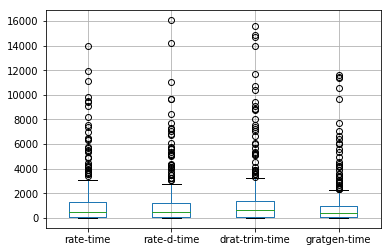

In [15]:
vf[[f'{checker}-time' for checker in checkers]].boxplot();

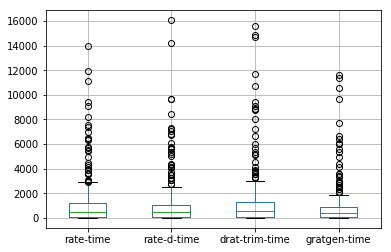

In [72]:
rupf = vf[vf['rate-RAT-introductions'] == 0]
rupf[[f'{checker}-time' for checker in checkers]].boxplot();

In [71]:
vf

,instance,solver,stime,sresult,rate-result,rate-time,rate-space,rate-solution,rate-verified,rate-reason-deletions,...,gratgen-solution,gratgen-verified,drat-trim-result,drat-trim-time,drat-trim-space,drat-trim-solution,drat-trim-verified,time-overhead,space-overhead,time-overhead-gratgen
40,ae_rphp035_05,abcdsat_r18@default,877.57,UNSATISFIABLE,verified,9801.48,6260.6,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,10410.25,10804.9,VERIFIED,VERIFIED,2101.48,-32.0,658.57
75,ae_rphp035_05,smallsat@default,789.42,UNSATISFIABLE,verified,4122.71,4734.9,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,5258.80,9123.3,VERIFIED,VERIFIED,137.25,70.6,631.66
117,ae_rphp055_04,CaDiCaL@DONTUNZIP-fixed,389.93,UNSATISFIABLE,verified,463.58,1439.1,VERIFIED,VERIFIED,190,...,VERIFIED,NaN,verified,637.18,4669.9,VERIFIED,VERIFIED,-1.35,0.2,72.98
137,ae_rphp055_04,Lingeling@default,2015.36,UNSATISFIABLE,verified,2352.07,2225.5,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,3001.10,5392.1,VERIFIED,VERIFIED,-87.43,0.0,302.17
152,ae_rphp055_04,Riss7.1-fix@BVE_DRAT,1041.79,UNSATISFIABLE,verified,965.37,2358.8,VERIFIED,VERIFIED,29,...,VERIFIED,NaN,verified,1232.13,4495.6,VERIFIED,VERIFIED,0.24,-25.6,153.65
300,a_rphp055_04,MapleCOMSPS_LRB_VSIDS_drup@LRB_VSIDS_drup,4088.57,UNSATISFIABLE,verified,2700.11,3894.6,VERIFIED,VERIFIED,103,...,VERIFIED,NaN,verified,3544.91,6579.9,VERIFIED,VERIFIED,-19.71,-34.0,594.55
308,a_rphp055_04,Riss7.1-fix@BVE_DRAT,1295.03,UNSATISFIABLE,verified,823.40,2375.5,VERIFIED,VERIFIED,32,...,VERIFIED,NaN,verified,1144.80,4302.6,VERIFIED,VERIFIED,-54.20,43.3,98.41
349,a_rphp065_04,Sparrow2Riss-2018-fixfix@MAIN,4625.73,UNSATISFIABLE,verified,2877.29,5266.9,VERIFIED,VERIFIED,28,...,VERIFIED,NaN,verified,3701.70,11093.1,VERIFIED,VERIFIED,94.09,765.6,144.62
390,assoc_mult_err_3.c,CaDiCaL@DONTUNZIP-fixed,73.81,UNSATISFIABLE,verified,130.34,489.6,VERIFIED,VERIFIED,8235,...,VERIFIED,NaN,verified,156.87,1244.6,VERIFIED,VERIFIED,-26.24,-2.3,79.59
410,assoc_mult_err_3.c,Lingeling@default,155.38,UNSATISFIABLE,verified,195.61,495.2,VERIFIED,VERIFIED,5303,...,VERIFIED,NaN,verified,200.59,571.4,VERIFIED,VERIFIED,-9.63,-1.2,92.24


# Memory usage distribution

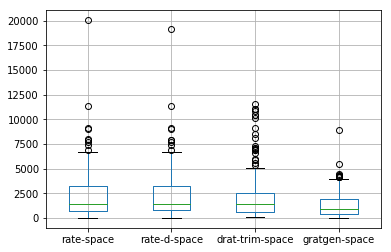

In [16]:
vf[[f'{checker}-space' for checker in checkers]].boxplot();

In [17]:
vf.head()

,instance,solver,stime,sresult,rate-result,rate-time,rate-space,rate-solution,rate-verified,rate-reason-deletions,...,gratgen-solution,gratgen-verified,drat-trim-result,drat-trim-time,drat-trim-space,drat-trim-solution,drat-trim-verified,time-overhead,space-overhead,time-overhead-gratgen
40,ae_rphp035_05,abcdsat_r18@default,877.57,UNSATISFIABLE,verified,9801.48,6260.6,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,10410.25,10804.9,VERIFIED,VERIFIED,2101.48,-32.0,658.57
75,ae_rphp035_05,smallsat@default,789.42,UNSATISFIABLE,verified,4122.71,4734.9,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,5258.80,9123.3,VERIFIED,VERIFIED,137.25,70.6,631.66
117,ae_rphp055_04,CaDiCaL@DONTUNZIP-fixed,389.93,UNSATISFIABLE,verified,463.58,1439.1,VERIFIED,VERIFIED,190,...,VERIFIED,NaN,verified,637.18,4669.9,VERIFIED,VERIFIED,-1.35,0.2,72.98
137,ae_rphp055_04,Lingeling@default,2015.36,UNSATISFIABLE,verified,2352.07,2225.5,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,3001.10,5392.1,VERIFIED,VERIFIED,-87.43,0.0,302.17
152,ae_rphp055_04,Riss7.1-fix@BVE_DRAT,1041.79,UNSATISFIABLE,verified,965.37,2358.8,VERIFIED,VERIFIED,29,...,VERIFIED,NaN,verified,1232.13,4495.6,VERIFIED,VERIFIED,0.24,-25.6,153.65


In [18]:

def sort_by_col(df, col):
    tmp = df.sort_values(col)
    tmp['index'] = np.arange(len(tmp))
    return tmp

def compare(df, what):
    ax = plt.subplot()
    x = list(range(len(df)))
    for checker in checkers:
        sort_by_col(df, f'{checker}-{what}').plot(x='index', y=f'{checker}-{what}', ax=ax)
    
vf_above_800s = vf[(vf['rate-time'] > 800) & (vf['rate-d-time'] > 800) & (vf['drat-trim-time'] > 800) & (vf['gratgen-time'] > 800)]


# Runtime

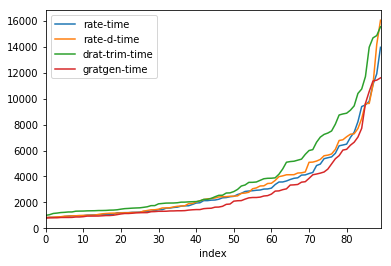

In [19]:
compare(vf_above_800s, 'time')

# Memory

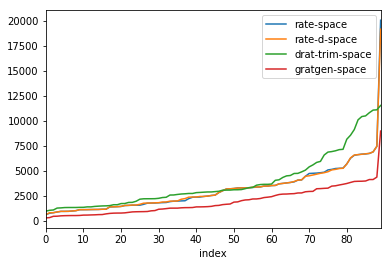

In [20]:
compare(vf_above_800s, 'space')

# Correlation: unit deletion overhead versus number of reason deletions

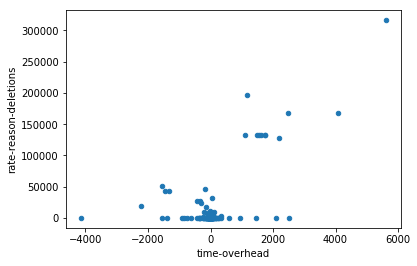

In [21]:
cf = df[(df['rate-result'] == 'verified') & (df['rate-d-result'] == 'verified')]
cf.plot('time-overhead', 'rate-reason-deletions', kind='scatter');

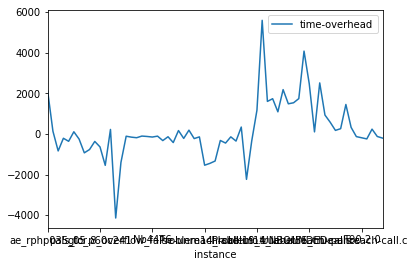

In [28]:
cf[abs(cf['time-overhead']) > 100].plot('instance', 'time-overhead');

In [ ]:
cf.plot('space-overhead', 'rate-reason-deletions', kind='scatter');

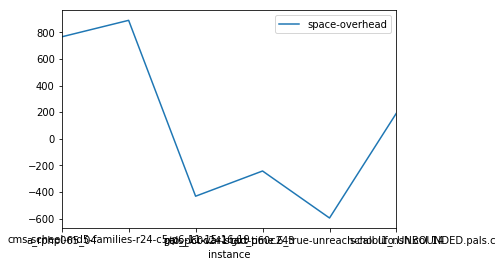

In [30]:
cf[abs(cf['space-overhead']) > 100].plot('instance', 'space-overhead');

# Highest runtime overhead

In [ ]:
cf.sort_values('time-overhead', ascending=False).head(10)[
    ['instance', 'solver'][:0] +
    ['time-overhead', 'rate-time', 'rate-d-time', 'rate-reason-deletions', 'rate-RUP-introductions', 'rate-RAT-introductions']
]

# Highest memory overhead

In [ ]:
cf.sort_values('space-overhead', ascending=False).head(10)[
    ['instance', 'solver'][:] +
    ['space-overhead', 'rate-space', 'rate-d-space', 'rate-reason-deletions', 'rate-RUP-introductions', 'rate-RAT-introductions']
]

# High memory consumption in rate

In [ ]:
vf[['instance', 'solver'] + [f'{checker}-space' for checker in checkers]].sort_values('rate-space', ascending=False).head()

In [ ]:
# same, with times
vf[['instance', 'solver'] + [f'{checker}-time' for checker in checkers] + [f'{checker}-space' for checker in checkers]].sort_values('rate-space', ascending=False).head()

## Possible reasons for memory overhead w.r.t drat-trim
- need to store unit clauses in the clause database
- the hash table used for parsing might be using more space

In [ ]:
vf[['rate-space']].sort_values('rate-space', ascending=False).head()

In [ ]:
vf[['rate-d-space']].sort_values('rate-d-space', ascending=False).head()

In [ ]:
vf[['drat-trim-space']].sort_values('drat-trim-space', ascending=False).head()

# RAT runs

In [ ]:
vf[['rate-d-time', 'gratgen-time', 'time-overhead-gratgen', 'rate-RAT-introductions']].sort_values(['rate-RAT-introductions', 'time-overhead-gratgen'], ascending=False).head(15)

In [ ]:
vf[['rate-d-time', 'gratgen-time', 'time-overhead-gratgen']].sort_values('time-overhead-gratgen', ascending=False).head(10)

In [ ]:
df.loc[2847]

In [ ]:
df.loc[2839]

# tmp

In [46]:
vf[vf['solver'] == 'varisat@default']

,instance,solver,stime,sresult,rate-result,rate-time,rate-space,rate-solution,rate-verified,rate-reason-deletions,...,gratgen-solution,gratgen-verified,drat-trim-result,drat-trim-time,drat-trim-space,drat-trim-solution,drat-trim-verified,time-overhead,space-overhead,time-overhead-gratgen
701,cms-scheel-md5-families-r24-c5-p6-11-15-16-19,varisat@default,2.39,UNSATISFIABLE,verified,0.93,29.6,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,1.53,69.5,VERIFIED,VERIFIED,0.04,0.1,-0.07
1559,gto_p60c234,varisat@default,2816.87,UNSATISFIABLE,verified,4106.01,6738.9,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,5339.30,11527.7,VERIFIED,VERIFIED,58.69,0.0,486.67
1949,mchess_15,varisat@default,783.06,UNSATISFIABLE,verified,1207.47,4454.0,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,1752.63,2957.5,VERIFIED,VERIFIED,-10.16,0.0,74.87
2534,newton_3_4_true-unreach-call.i,varisat@default,2617.24,UNSATISFIABLE,verified,96.96,2073.9,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,167.42,894.3,VERIFIED,VERIFIED,-1.82,-1.2,-41.13
2846,Problem14_label20_true-unreach-call.c,varisat@default,8.74,UNSATISFIABLE,verified,17.59,903.9,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,20.22,627.0,VERIFIED,VERIFIED,-2.21,2.3,-6.34
3431,T103.2.0,varisat@default,2344.25,UNSATISFIABLE,verified,155.83,1728.7,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,194.93,1623.0,VERIFIED,VERIFIED,0.58,0.2,-17.59
3509,T107.2.0,varisat@default,4089.97,UNSATISFIABLE,verified,293.33,1830.0,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,315.14,1706.0,VERIFIED,VERIFIED,2.98,1.3,10.76
3548,T116.2.0,varisat@default,1524.44,UNSATISFIABLE,verified,108.81,1691.3,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,136.45,1462.2,VERIFIED,VERIFIED,3.98,0.0,-25.00
3743,T56.2.0,varisat@default,1128.27,UNSATISFIABLE,verified,165.27,1739.1,VERIFIED,VERIFIED,0,...,VERIFIED,NaN,verified,188.18,1524.1,VERIFIED,VERIFIED,0.20,0.1,-23.11


In [47]:
vf[vf['solver'] == 'varisat@default'].describe()

,rate-time,rate-space,rate-reason-deletions,rate-RAT-introductions,rate-RUP-introductions,rate-d-time,rate-d-space,rate-d-reason-deletions,gratgen-time,gratgen-space,gratgen-verified,drat-trim-time,drat-trim-space,time-overhead,space-overhead,time-overhead-gratgen
count,9.000000,9.000000,9.0,9.0,9.000000e+00,9.000000,9.000000,9.0,9.000000,9.000000,0.0,9.000000,9.000000,9.000000,9.000000,9.000000
mean,683.577778,2354.377778,0.0,0.0,1.664839e+06,677.768889,2354.066667,0.0,626.762222,1625.977778,NaN,901.755556,2487.922222,5.808889,0.311111,51.006667
std,1335.617156,2021.888891,0.0,0.0,3.709151e+06,1317.472933,2022.142608,0.0,1152.671988,1129.474559,NaN,1749.326676,3484.430855,20.240270,0.975249,166.716159
min,0.930000,29.600000,0.0,0.0,1.180000e+02,0.890000,29.500000,0.0,0.960000,26.700000,NaN,1.530000,69.500000,-10.160000,-1.200000,-41.130000
25%,96.960000,1691.300000,0.0,0.0,5.244300e+04,98.780000,1691.300000,0.0,129.830000,1040.700000,NaN,136.450000,894.300000,-1.820000,0.000000,-23.110000
50%,155.830000,1739.100000,0.0,0.0,9.345100e+04,155.250000,1739.000000,0.0,172.840000,1530.500000,NaN,188.180000,1524.100000,0.200000,0.100000,-6.340000
75%,293.330000,2073.900000,0.0,0.0,1.142510e+05,290.350000,2075.100000,0.0,279.590000,1609.800000,NaN,315.140000,1706.000000,2.980000,0.200000,10.760000
max,4106.010000,6738.900000,0.0,0.0,1.110798e+07,4047.320000,6738.900000,0.0,3560.650000,4128.600000,NaN,5339.300000,11527.700000,58.690000,2.300000,486.670000


# TODO

- ~~crash~~
- RAT runs - not useful?
- sick format
   - RAT: ok
   - PR: ok
   - SR: TODO
- run experiments without LRAT generation
- gratgen way of extracting dependencies?
- proof format (SR)


- minisat patch
